In [1]:
# Add src to path for local execution without install
import sys
import os
sys.path.append(os.path.abspath('../src'))


# 在室人数トレンド分析 (Occupancy Trend Analysis)

自習室の混雑傾向を分析します。
主に「どの曜日・時間帯が混んでいるか」を可視化します。

In [2]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
from seras_analysis.data_loader import load_data
from seras_analysis.preprocessing import filter_occupancy_data
from seras_analysis.plotting import plot_daily_trends, plot_daily_breakdown, plot_average_occupancy_heatmap

# データ読み込み
df_logs, _ = load_data()

# ==========================================
# Data Cleaning & Filtering
# ==========================================
# 1. Filter data starting from Dec 7th, 2025 (Data collection started)
# 2. Exclude "Today" (Incomplete data) to avoid skewing averages
start_analysis_date = date(2025, 12, 7)

df_clean = filter_occupancy_data(df_logs, start_date=start_analysis_date, exclude_today=True)

print(f"Data loaded and filtered. Analysis Period: {start_analysis_date} to {df_clean['Date'].max()}")
display(df_clean)

除外対象の日付（最新日）: 2025-12-20
Data loaded and filtered. Analysis Period: 2025-12-07 to 2025-12-19


Timestamp,Date,Day,Hour,Building1,Building2,Total
datetime[μs],date,str,i64,i64,i64,i64
2025-12-07 06:00:15,2025-12-07,"""Sun""",6,1,0,1
2025-12-07 06:15:15,2025-12-07,"""Sun""",6,1,0,1
2025-12-07 06:30:14,2025-12-07,"""Sun""",6,1,0,1
2025-12-07 06:45:15,2025-12-07,"""Sun""",6,1,0,1
2025-12-07 07:00:15,2025-12-07,"""Sun""",7,1,0,1
…,…,…,…,…,…,…
2025-12-19 21:45:15,2025-12-19,"""Fri""",21,8,0,8
2025-12-19 22:00:15,2025-12-19,"""Fri""",22,6,0,6
2025-12-19 22:15:15,2025-12-19,"""Fri""",22,1,0,1


## 1. 平均混雑度ヒートマップ (Average Occupancy Heatmap)
曜日 × 時間帯ごとの平均人数をヒートマップで可視化します。
色が濃い部分が「混雑しやすい時間帯」です。

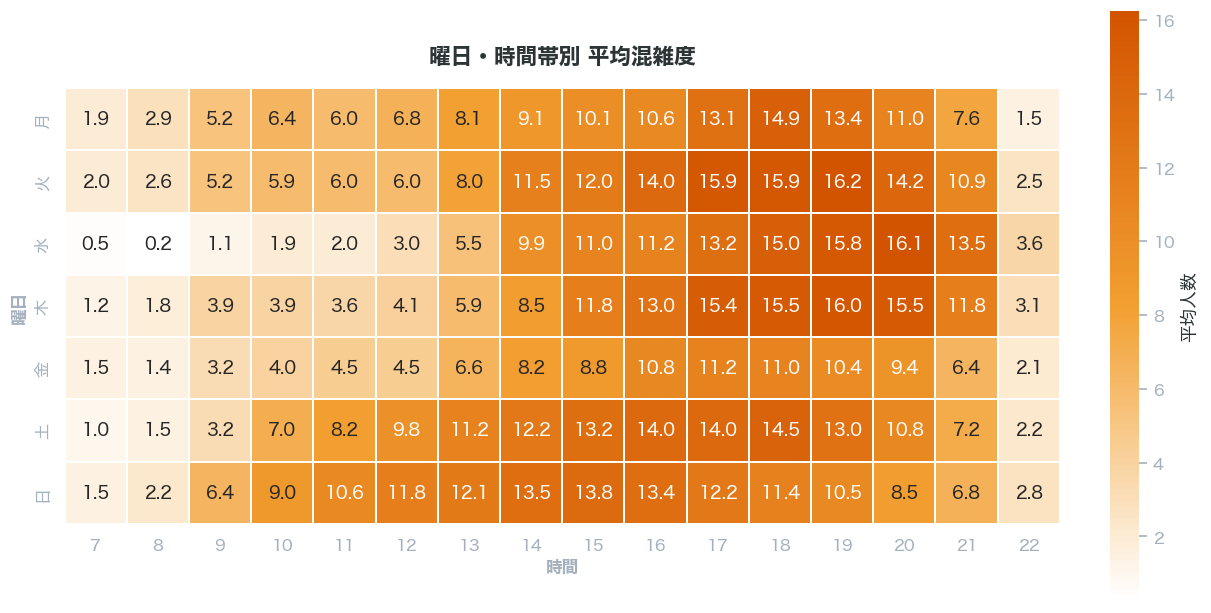

In [3]:
# 2024年12月7日以降のデータで分析（当日除外済み）
plot_average_occupancy_heatmap(df_clean)

## 2. 日次トレンド (Daily Trends Overlay)
日ごとの推移を重ね合わせて表示します。
**太線**は平日・休日の平均トレンドを表します。

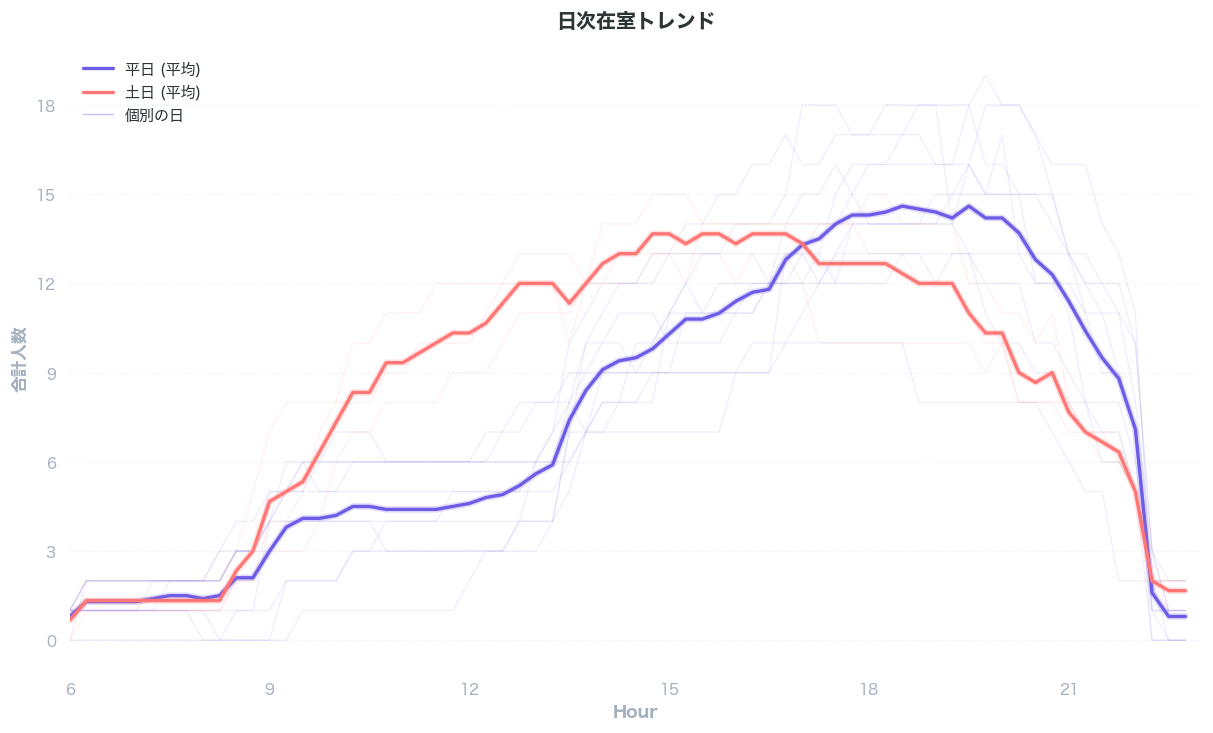

In [4]:
# 日次トレンド（オーバーレイ）
plot_daily_trends(df_clean)

## 3. 日次内訳 (Daily Breakdown)
日ごとの2号館・1号館（本館）の内訳を積み上げグラフで確認します。
イレギュラーな動きがないか確認するのに適しています。

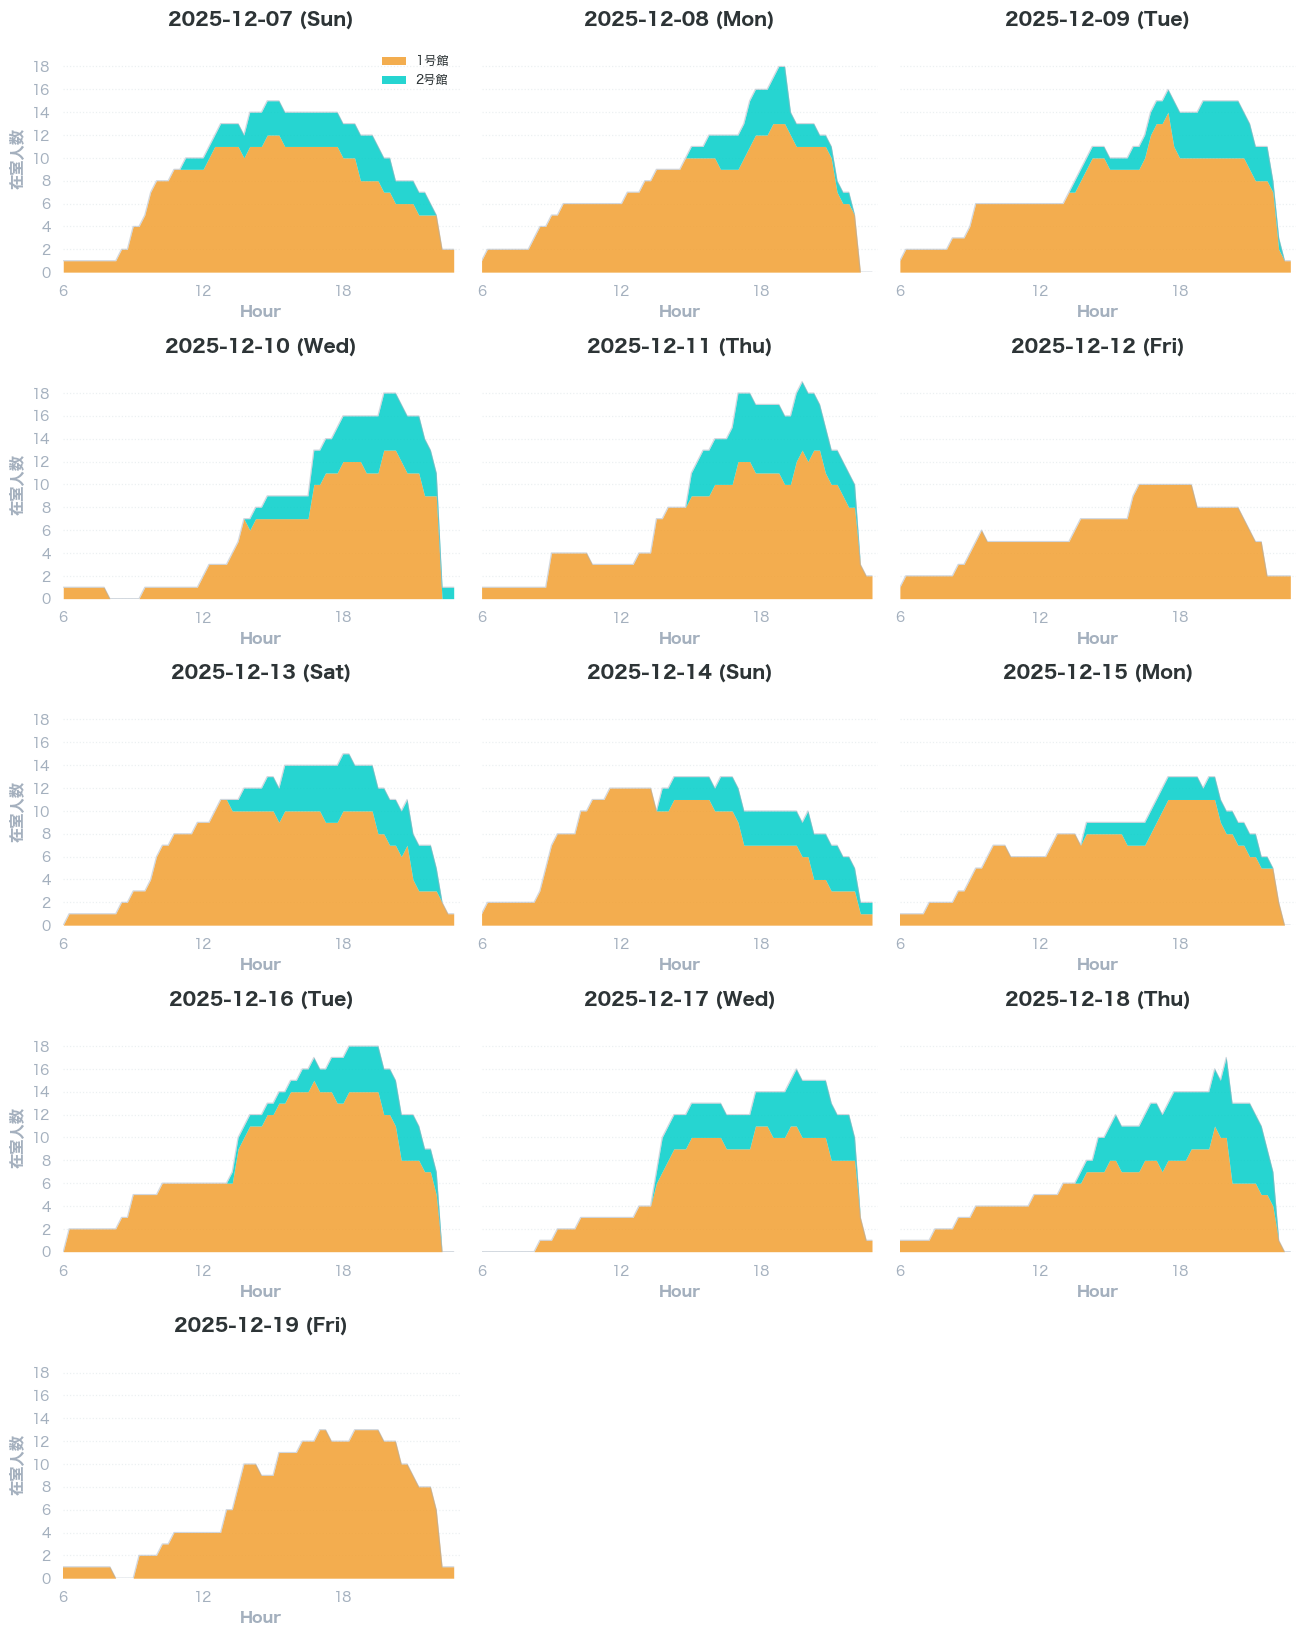

In [5]:
# 日次内訳（スモールマルチプル）
plot_daily_breakdown(df_clean)